<a href="https://colab.research.google.com/github/AusafMo/AusafMo/blob/main/Medicinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/medicinal/leaf.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/leaf') #Extracts the files into the /tmp folder
zip_ref.close()

In [3]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14


---
# **Importing Files** 
Restructing and Renaming Directories
---



In [4]:
ImagePATH = f"/leaf/"

In [5]:
from glob import glob
types = glob(ImagePATH+"*")

In [6]:
print(types)

['/leaf/Azadirachta Indica (Neem)', '/leaf/Trigonella Foenum-graecum (Fenugreek)', '/leaf/Plectranthus Amboinicus (Mexican Mint)', '/leaf/Psidium Guajava (Guava)', '/leaf/Punica Granatum (Pomegranate)', '/leaf/Mangifera Indica (Mango)', '/leaf/Citrus Limon (Lemon)', '/leaf/Ocimum Tenuiflorum (Tulsi)', '/leaf/Pongamia Pinnata (Indian Beech)', '/leaf/Hibiscus Rosa-sinensis', '/leaf/Jasminum (Jasmine)', '/leaf/Amaranthus Viridis (Arive-Dantu)', '/leaf/Basella Alba (Basale)', '/leaf/Santalum Album (Sandalwood)', '/leaf/Muntingia Calabura (Jamaica Cherry-Gasagase)', '/leaf/Ficus Religiosa (Peepal Tree)', '/leaf/Nyctanthes Arbor-tristis (Parijata)', '/leaf/Ficus Auriculata (Roxburgh fig)', '/leaf/Syzygium Jambos (Rose Apple)', '/leaf/Piper Betle (Betel)', '/leaf/Brassica Juncea (Indian Mustard)', '/leaf/Mentha (Mint)', '/leaf/Nerium Oleander (Oleander)', '/leaf/Artocarpus Heterophyllus (Jackfruit)', '/leaf/Alpinia Galanga (Rasna)', '/leaf/Syzygium Cumini (Jamun)', '/leaf/Tabernaemontana Diva

In [7]:
# Making DATAFRAME

filedf = pd.DataFrame()
for typ in types:
    files = glob(typ + "/*" )
    tempdf = pd.DataFrame( { 'filepath' : files, 'types':typ.split("/")[-1]} )
    filedf = pd.concat( [ filedf, tempdf ] )

In [8]:
filedf.head()

,filepath,types
0,/leaf/Azadirachta Indica (Neem)/AI-S-018.jpg,Azadirachta Indica (Neem)
1,/leaf/Azadirachta Indica (Neem)/AI-S-060.jpg,Azadirachta Indica (Neem)
2,/leaf/Azadirachta Indica (Neem)/AI-S-040.jpg,Azadirachta Indica (Neem)
3,/leaf/Azadirachta Indica (Neem)/AI-S-053.jpg,Azadirachta Indica (Neem)
4,/leaf/Azadirachta Indica (Neem)/AI-S-037.jpg,Azadirachta Indica (Neem)


### ***Grouping the types and arranging them by their count ( number of samples )***

In [9]:
gby_cnt = filedf.groupby( "types" ).aggregate( 'count' ).rename( columns = {'filepath' : 'cnt' } ).reset_index().sort_values( by = 'cnt', ascending = False )

In [10]:
gby_cnt

,types,cnt
1,Amaranthus Viridis (Arive-Dantu),122
4,Basella Alba (Basale),103
13,Mentha (Mint),97
24,Punica Granatum (Pomegranate),79
14,Moringa Oleifera (Drumstick),77
6,Carissa Carandas (Karanda),74
11,Jasminum (Jasmine),71
23,Psidium Guajava (Guava),65
9,Ficus Religiosa (Peepal Tree),63
17,Nerium Oleander (Oleander),62


In [11]:
fig = px.bar( gby_cnt, x = 'types', y = 'cnt', color = 'types', title = 'Counts from Each Types')
fig.show()

In [12]:
!mkdir outputs

mkdir: cannot create directory ‘outputs’: File exists


In [13]:
gby_cnt.to_csv(f"outputs/types_counts.csv", index = None )

# **Checking Some Data Samples**

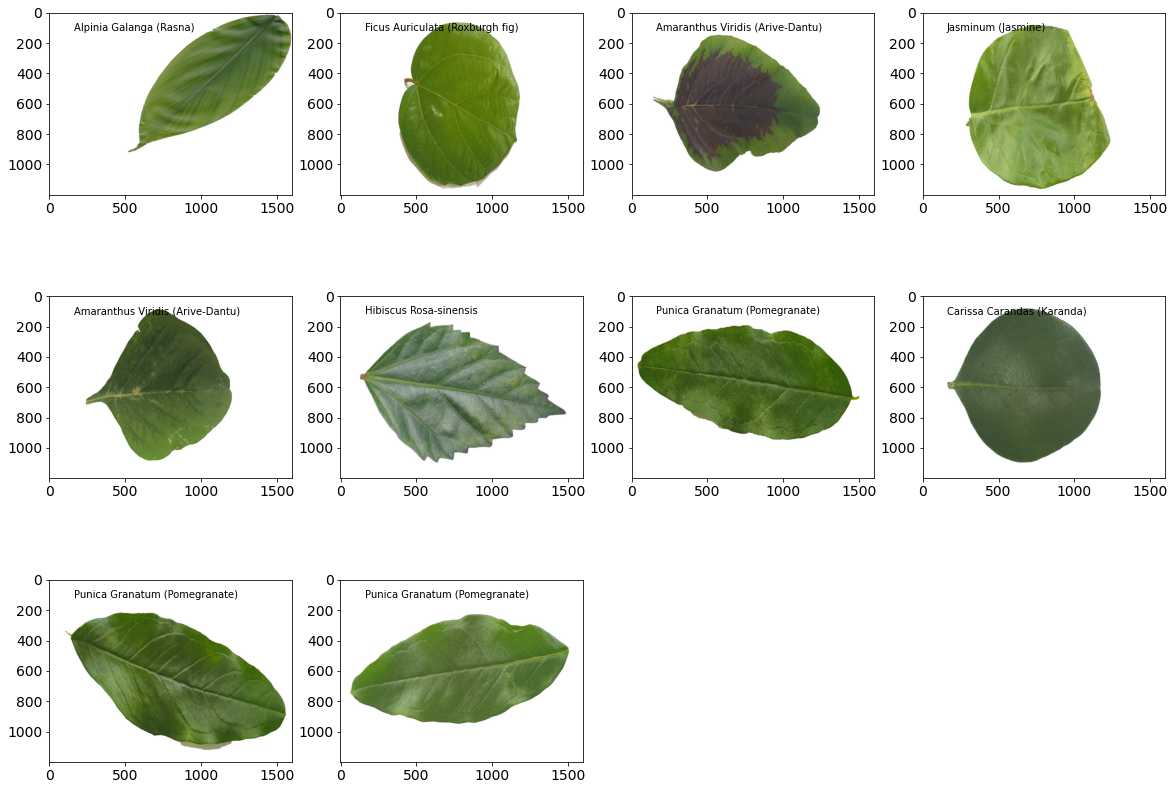

In [14]:
plt.figure( figsize = ( 20, 20 ) )

for i in range(10):

    path = filedf.sample( 1 )['filepath'].values[0]
    types = path.split( "/" )[2]
    ex_img = Image.open(path)
    ax = plt.subplot( 4, 4, i + 1 )
    ax.annotate( types, xy = ( 0.1, 0.9 ), xycoords = " axes fraction ", weight = 'light', size = 10 )
    ax.imshow(ex_img)

plt.show()

# **Splitting the DataSet into Train Test Split**

In [15]:
print("dataframe length:", len(filedf))

print(filedf.types.value_counts().head(10))

print("total samples: ", filedf.types.value_counts().sum())


dataframe length: 1835
Amaranthus Viridis (Arive-Dantu)    122
Basella Alba (Basale)               103
Mentha (Mint)                        97
Punica Granatum (Pomegranate)        79
Moringa Oleifera (Drumstick)         77
Carissa Carandas (Karanda)           74
Jasminum (Jasmine)                   71
Psidium Guajava (Guava)              65
Ficus Religiosa (Peepal Tree)        63
Mangifera Indica (Mango)             62
Name: types, dtype: int64
total samples:  1835


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
        filedf, filedf['types'], stratify = filedf['types'], test_size=0.4)

X_test, X_val, Y_test, Y_val = train_test_split(
        X_test, X_test['types'], stratify = X_test['types'], test_size=0.5)

In [17]:
X_train

,filepath,types
1,/leaf/Psidium Guajava (Guava)/PG-S-013.jpg,Psidium Guajava (Guava)
14,/leaf/Alpinia Galanga (Rasna)/AG-S-048.jpg,Alpinia Galanga (Rasna)
8,/leaf/Basella Alba (Basale)/BA-S-063.jpg,Basella Alba (Basale)
4,/leaf/Piper Betle (Betel)/PB-S-013.jpg,Piper Betle (Betel)
51,/leaf/Psidium Guajava (Guava)/PG-S-064.jpg,Psidium Guajava (Guava)
...,...,...
118,/leaf/Amaranthus Viridis (Arive-Dantu)/AV-S-04...,Amaranthus Viridis (Arive-Dantu)
55,/leaf/Amaranthus Viridis (Arive-Dantu)/AV-S-11...,Amaranthus Viridis (Arive-Dantu)
44,/leaf/Santalum Album (Sandalwood)/SA-S-007.jpg,Santalum Album (Sandalwood)
63,/leaf/Mentha (Mint)/M-S-067.jpg,Mentha (Mint)


In [18]:
X_test

,filepath,types
15,/leaf/Nerium Oleander (Oleander)/NO-S-038.jpg,Nerium Oleander (Oleander)
45,/leaf/Ficus Auriculata (Roxburgh fig)/FA-S-040...,Ficus Auriculata (Roxburgh fig)
25,/leaf/Carissa Carandas (Karanda)/CC-S-067.jpg,Carissa Carandas (Karanda)
26,/leaf/Pongamia Pinnata (Indian Beech)/PP-S-043...,Pongamia Pinnata (Indian Beech)
3,/leaf/Mangifera Indica (Mango)/MI-S-060.jpg,Mangifera Indica (Mango)
...,...,...
50,/leaf/Jasminum (Jasmine)/J-S-026.jpg,Jasminum (Jasmine)
3,/leaf/Mentha (Mint)/M-S-024.jpg,Mentha (Mint)
79,/leaf/Basella Alba (Basale)/BA-S-019.jpg,Basella Alba (Basale)
55,/leaf/Nerium Oleander (Oleander)/NO-S-001.jpg,Nerium Oleander (Oleander)


In [19]:
Y_train

1               Psidium Guajava (Guava)
14              Alpinia Galanga (Rasna)
8                 Basella Alba (Basale)
4                   Piper Betle (Betel)
51              Psidium Guajava (Guava)
                     ...               
118    Amaranthus Viridis (Arive-Dantu)
55     Amaranthus Viridis (Arive-Dantu)
44          Santalum Album (Sandalwood)
63                        Mentha (Mint)
18         Syzygium Jambos (Rose Apple)
Name: types, Length: 1101, dtype: object

In [20]:
Y_test

15         Nerium Oleander (Oleander)
45    Ficus Auriculata (Roxburgh fig)
25         Carissa Carandas (Karanda)
26    Pongamia Pinnata (Indian Beech)
3            Mangifera Indica (Mango)
                   ...               
50                 Jasminum (Jasmine)
3                       Mentha (Mint)
79              Basella Alba (Basale)
55         Nerium Oleander (Oleander)
24            Psidium Guajava (Guava)
Name: types, Length: 367, dtype: object

In [21]:
X_val

,filepath,types
50,/leaf/Tabernaemontana Divaricata (Crape Jasmin...,Tabernaemontana Divaricata (Crape Jasmine)
46,/leaf/Tabernaemontana Divaricata (Crape Jasmin...,Tabernaemontana Divaricata (Crape Jasmine)
13,/leaf/Murraya Koenigii (Curry)/MK-S-039.jpg,Murraya Koenigii (Curry)
33,/leaf/Nerium Oleander (Oleander)/NO-S-035.jpg,Nerium Oleander (Oleander)
55,/leaf/Mentha (Mint)/M-S-006.jpg,Mentha (Mint)
...,...,...
3,/leaf/Tabernaemontana Divaricata (Crape Jasmin...,Tabernaemontana Divaricata (Crape Jasmine)
42,/leaf/Basella Alba (Basale)/BA-S-041.jpg,Basella Alba (Basale)
31,/leaf/Carissa Carandas (Karanda)/CC-S-010.jpg,Carissa Carandas (Karanda)
35,/leaf/Artocarpus Heterophyllus (Jackfruit)/AH-...,Artocarpus Heterophyllus (Jackfruit)


In [22]:
Y_val

50    Tabernaemontana Divaricata (Crape Jasmine)
46    Tabernaemontana Divaricata (Crape Jasmine)
13                      Murraya Koenigii (Curry)
33                    Nerium Oleander (Oleander)
55                                 Mentha (Mint)
                         ...                    
3     Tabernaemontana Divaricata (Crape Jasmine)
42                         Basella Alba (Basale)
31                    Carissa Carandas (Karanda)
35          Artocarpus Heterophyllus (Jackfruit)
13                        Hibiscus Rosa-sinensis
Name: types, Length: 367, dtype: object

In [23]:
X_train['use'] = 'train'
X_val['use'] = 'val'
X_test['use'] = 'test'

In [24]:
fulldf = pd.concat([ X_train, X_test, X_val ])

In [25]:
fulldf.use.value_counts()


train    1101
test      367
val       367
Name: use, dtype: int64

#### Final DATFRAME

In [26]:
fulldf.head(20)

,filepath,types,use
1,/leaf/Psidium Guajava (Guava)/PG-S-013.jpg,Psidium Guajava (Guava),train
14,/leaf/Alpinia Galanga (Rasna)/AG-S-048.jpg,Alpinia Galanga (Rasna),train
8,/leaf/Basella Alba (Basale)/BA-S-063.jpg,Basella Alba (Basale),train
4,/leaf/Piper Betle (Betel)/PB-S-013.jpg,Piper Betle (Betel),train
51,/leaf/Psidium Guajava (Guava)/PG-S-064.jpg,Psidium Guajava (Guava),train
61,/leaf/Punica Granatum (Pomegranate)/PG-S-061.jpg,Punica Granatum (Pomegranate),train
6,/leaf/Trigonella Foenum-graecum (Fenugreek)/TF...,Trigonella Foenum-graecum (Fenugreek),train
64,/leaf/Carissa Carandas (Karanda)/CC-S-013.jpg,Carissa Carandas (Karanda),train
31,/leaf/Psidium Guajava (Guava)/PG-S-050.jpg,Psidium Guajava (Guava),train
22,/leaf/Basella Alba (Basale)/BA-S-018.jpg,Basella Alba (Basale),train


##### BASELINE ACCURACY

In [27]:
fulldf.types.value_counts()[0] / len( fulldf ) ## basically which sample dominates

0.0664850136239782

### **Creating Train, Test, Validation Folders**

In [28]:
!mkdir data
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

mkdir: cannot create directory ‘data’: File exists


In [29]:
fulldf.types.unique()

array(['Psidium Guajava (Guava)', 'Alpinia Galanga (Rasna)',
       'Basella Alba (Basale)', 'Piper Betle (Betel)',
       'Punica Granatum (Pomegranate)',
       'Trigonella Foenum-graecum (Fenugreek)',
       'Carissa Carandas (Karanda)', 'Mangifera Indica (Mango)',
       'Citrus Limon (Lemon)', 'Ficus Religiosa (Peepal Tree)',
       'Mentha (Mint)', 'Murraya Koenigii (Curry)',
       'Syzygium Jambos (Rose Apple)', 'Amaranthus Viridis (Arive-Dantu)',
       'Jasminum (Jasmine)', 'Azadirachta Indica (Neem)',
       'Muntingia Calabura (Jamaica Cherry-Gasagase)',
       'Brassica Juncea (Indian Mustard)',
       'Ficus Auriculata (Roxburgh fig)', 'Santalum Album (Sandalwood)',
       'Moringa Oleifera (Drumstick)',
       'Artocarpus Heterophyllus (Jackfruit)',
       'Tabernaemontana Divaricata (Crape Jasmine)',
       'Syzygium Cumini (Jamun)', 'Ocimum Tenuiflorum (Tulsi)',
       'Nyctanthes Arbor-tristis (Parijata)', 'Hibiscus Rosa-sinensis',
       'Plectranthus Amboinicus (Mex

In [30]:
for typ in fulldf.types.unique():
    os.system(f"mkdir data/train/'{typ}'") 
    os.system(f"mkdir data/test/'{typ}'") 
    os.system(f"mkdir data/val/'{typ}'") 

In [31]:
fulldf.head()

,filepath,types,use
1,/leaf/Psidium Guajava (Guava)/PG-S-013.jpg,Psidium Guajava (Guava),train
14,/leaf/Alpinia Galanga (Rasna)/AG-S-048.jpg,Alpinia Galanga (Rasna),train
8,/leaf/Basella Alba (Basale)/BA-S-063.jpg,Basella Alba (Basale),train
4,/leaf/Piper Betle (Betel)/PB-S-013.jpg,Piper Betle (Betel),train
51,/leaf/Psidium Guajava (Guava)/PG-S-064.jpg,Psidium Guajava (Guava),train


In [32]:
for i, row in fulldf.iterrows():
   
    # plant category
    typ = row['types']
   
    # section is train,val or test
    section = row['use']
   
    # input filepath to copy
    ipath = row['filepath']
   
    # output filepath to paste
    opath = ipath.replace(f"/leaf/",f"data/{section}/")
   
   
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")

# **Data Preprocessing**


### **Transforms**
In order to use our images with a network trained on the Imagenet dataset, we need to preprocess our images in the same way as the Imagenet network. For that, we need to rescale the images to 224×224 and normalize them as per Imagenet standards. We can use the torchvision transforms library to do that. Here we take a CenterCrop of 224×224 and normalize as per Imagenet standards. 

# PLANT MODEL

In [33]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn

from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import numpy as np
import tqdm

In [34]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [35]:
from torch import Tensor, nn
from torch.nn.functional import interpolate

In [36]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

In [37]:
traindir = f"data/train"
validdir = f"data/val"
testdir = f"data/test"

In [38]:
os.listdir('data/train/')

['Azadirachta Indica (Neem)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Mangifera Indica (Mango)',
 'Citrus Limon (Lemon)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Pongamia Pinnata (Indian Beech)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Basella Alba (Basale)',
 'Santalum Album (Sandalwood)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Ficus Religiosa (Peepal Tree)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ficus Auriculata (Roxburgh fig)',
 'Syzygium Jambos (Rose Apple)',
 'Piper Betle (Betel)',
 'Brassica Juncea (Indian Mustard)',
 'Mentha (Mint)',
 'Nerium Oleander (Oleander)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Alpinia Galanga (Rasna)',
 'Syzygium Cumini (Jamun)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Moringa Oleifera (Drumstick)',
 'Murraya Koenigii (Curry)',
 'Carissa Carandas (Karanda)']

In [39]:
save_file_name = f'resnet50-transfer.pt'
checkpoint_path = f'resnet50-transfer.pth'

# Change to fit hardware
batch_size = 512

# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
print(train_on_gpu,multi_gpu)

Train on gpu: True
1 gpus detected.
True False


In [40]:
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    
        # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

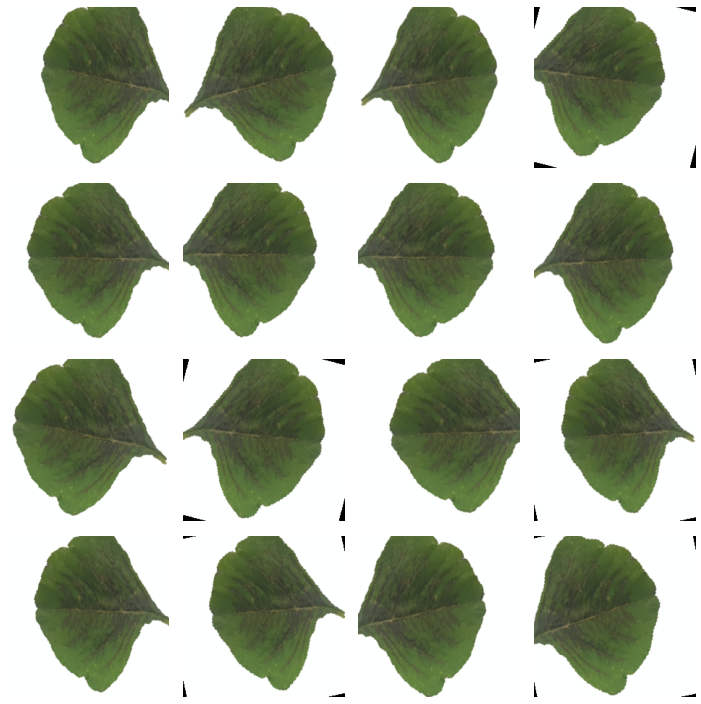

In [44]:
ex_img = Image.open('/content/data/train/Amaranthus Viridis (Arive-Dantu)/AV-S-002.jpg')

t = image_transforms['train']
plt.figure(figsize=(10, 10))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)

plt.tight_layout()

## DATALOADER

In [45]:
# Datasets from folders
data = {
    'train':
    datasets.ImageFolder( root = traindir, transform = image_transforms['train'] ),
    'valid':
    datasets.ImageFolder( root = validdir, transform = image_transforms['valid']),
    'test':
    datasets.ImageFolder( root = testdir, transform = image_transforms['test'])
}

# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader( data['train'], batch_size = batch_size, shuffle = True, num_workers = 2 ),
    'val': DataLoader( data['valid'], batch_size = batch_size, shuffle = True, num_workers = 2),
    'test': DataLoader( data['test'], batch_size = batch_size, shuffle = True, num_workers= 2)
}

In [46]:
# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([512, 3, 224, 224]), torch.Size([512]))

In [47]:
categories = []
for d in os.listdir(traindir):
    categories.append(d)
    
n_classes = len(categories)
print(f'There are {n_classes} different classes.')

There are 30 different classes.


## **Some Statistics**

In [48]:
class_to_idx = data['train'].class_to_idx
idx_to_class = {
    idx: class_
    for class_, idx in data['train'].class_to_idx.items()
}

In [49]:
train_cnts = Counter([idx_to_class[x] for x in data['train'].targets])
val_cnts = Counter([idx_to_class[x] for x in data['valid'].targets])
test_cnts = Counter([idx_to_class[x] for x in data['test'].targets])

In [50]:
train_cnts = pd.DataFrame({'cat' :list(train_cnts.keys()), 'train_cnt': list(train_cnts.values())})
val_cnts = pd.DataFrame({'cat' :list(val_cnts.keys()), 'val_cnt': list(val_cnts.values())})
test_cnts = pd.DataFrame({'cat' :list(test_cnts.keys()), 'test_cnt': list(test_cnts.values())})

In [51]:
cnt_df = pd.merge(train_cnts,val_cnts,on='cat',how='left').merge(test_cnts,on='cat',how='left')

In [52]:
cnt_df.head()

,cat,train_cnt,val_cnt,test_cnt
0,Alpinia Galanga (Rasna),30,10,10
1,Amaranthus Viridis (Arive-Dantu),73,24,25
2,Artocarpus Heterophyllus (Jackfruit),34,11,11
3,Azadirachta Indica (Neem),36,12,12
4,Basella Alba (Basale),62,20,21


## **MODELS**

In [53]:
model = models.resnet50( pretrained = True )

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.



In [54]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

In [55]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [56]:
n_inputs = model.fc.in_features

In [57]:
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [58]:
model.fc


Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=30, bias=True)
  (4): LogSoftmax(dim=1)
)

In [59]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

24,040,286 total parameters.
532,254 training parameters.


In [60]:
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)

In [61]:
if multi_gpu:
    print(model.module.fc)
else:
    print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=30, bias=True)
  (4): LogSoftmax(dim=1)
)


In [62]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

[(0, 'Alpinia Galanga (Rasna)'),
 (1, 'Amaranthus Viridis (Arive-Dantu)'),
 (2, 'Artocarpus Heterophyllus (Jackfruit)'),
 (3, 'Azadirachta Indica (Neem)'),
 (4, 'Basella Alba (Basale)'),
 (5, 'Brassica Juncea (Indian Mustard)'),
 (6, 'Carissa Carandas (Karanda)'),
 (7, 'Citrus Limon (Lemon)'),
 (8, 'Ficus Auriculata (Roxburgh fig)'),
 (9, 'Ficus Religiosa (Peepal Tree)')]

In [63]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [64]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 2048])
torch.Size([256])
torch.Size([30, 256])
torch.Size([30])


In [65]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f}        \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [66]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=3,
    n_epochs=100,
    print_every=1)


Starting Training from Scratch.


Epoch: 0 	Training Loss: 3.3655        	Validation Loss: 3.1556
		Training Accuracy: 5.99%	 Validation Accuracy: 7.36%

Epoch: 1 	Training Loss: 2.9917        	Validation Loss: 2.7937
		Training Accuracy: 19.44%	 Validation Accuracy: 31.34%

Epoch: 2 	Training Loss: 2.6453        	Validation Loss: 2.4168
		Training Accuracy: 32.33%	 Validation Accuracy: 50.14%

Epoch: 3 	Training Loss: 2.2912        	Validation Loss: 2.0431
		Training Accuracy: 50.32%	 Validation Accuracy: 64.85%

Epoch: 4 	Training Loss: 2.0012        	Validation Loss: 1.7160
		Training Accuracy: 56.49%	 Validation Accuracy: 69.48%

Epoch: 5 	Training Loss: 1.7227        	Validation Loss: 1.4317
		Training Accuracy: 64.85%	 Validation Accuracy: 80.11%

Epoch: 6 	Training Loss: 1.4915        	Validation Loss: 1.2091
		Training Accuracy: 73.02%	 Validation Accuracy: 84.74%

Epoch: 7 	Training Loss: 1.2871        	Validation Loss: 1.0218
		Training Accuracy: 75.66%	 Validation Accuracy: 

## **Results**

Text(0.5, 1.0, 'Training and Validation Losses')

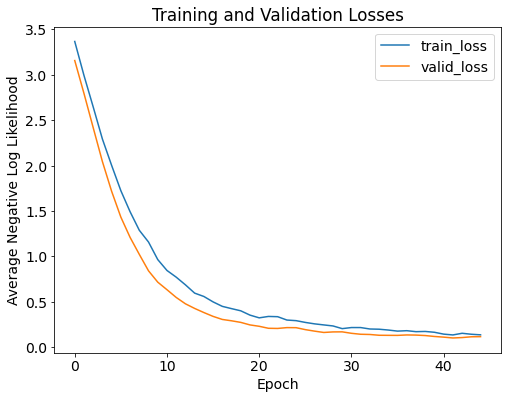

In [67]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

Text(0.5, 1.0, 'Training and Validation Accuracy')

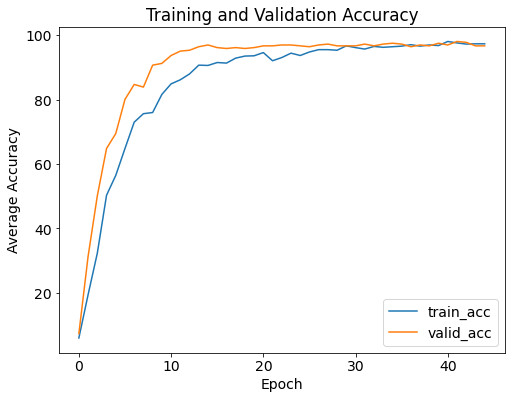

In [68]:
plt.figure(figsize = (8, 6))

for c in ['train_acc', 'valid_acc']:
    plt.plot(100 * history[c], label = c)
    
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

#Save Model

In [69]:
def save_checkpoint(model, path):
    
    """Save a PyTorch model checkpoint

    Params
    --------
        model (PyTorch model): model to save
        path (str): location to save model. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Basic details
    checkpoint = {
        'class_to_idx': model.class_to_idx,
        'idx_to_class': model.idx_to_class,
        'epochs': model.epochs,
    }

    # Extract the final classifier and the state dictionary

    if model_name == 'vgg16':
      
        # Check to see if model was parallelized
        if multi_gpu:
            checkpoint['classifier'] = model.module.classifier
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['classifier'] = model.classifier
            checkpoint['state_dict'] = model.state_dict()

    elif model_name == 'resnet50':
        if multi_gpu:
            checkpoint['fc'] = model.module.fc
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['fc'] = model.fc
            checkpoint['state_dict'] = model.state_dict()

    # Add the optimizer
    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()

    # Save the data to the path
    torch.save(checkpoint, path)

In [70]:
save_checkpoint(model, path=checkpoint_path)